<a href="https://colab.research.google.com/github/nastya-andreeva/IntroductionToAI/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ЛАБОРАТОРНАЯ РАБОТА 2**

Андреева Анастасия

Группа: БИВТ-22-СП-3

Датасет: Application_Data

In [2]:
import pandas as pd

data = pd.read_csv('Application_Data.csv', sep=',')
data.head()
# display(data)

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


# Задача

*2) Описать кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от - бесконечности до + бесконечности) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])*

Описание переменных:

*   Applicant_ID - уникальный идентификатор
*   Applicant_Gender - пол заявителя (M/F)
*   Owned_Car - владеет ли заявитель автомобилем (0/1)
*   Owned_Realty - владеет ли заявитель недвижимостью (0/1)
*   Total_Children - количество детей
*   Total_Income - доход
*   Income_Type - тип дохода
*   Education_Type - тип образования
*   Family_Status - семейный статус
*   Housing_Type - тип жилья
*   Owned_Mobile_Phone - есть ли мобильный телефон (0/1)
*   Owned_Work_Phone - есть ли рабочий телефон (0/1)
*   Owned_Phone - есть ли телефон (0/1)
*   Owned_Email - есть ли email (0/1)
*   Job_Title - должность
*   Total_Family_Members - количество членов семьи
*   Applicant_Age - возраст заявителя
*   Years_of_Working - стаж работы
*   Total_Bad_Debt - количество "плохих" задолженностей
*   Total_Good_Debt - количество "хороших" задолженностей
*   Status - статус (0/1)


Задача:

Предсказать целевую переменную - статус (возможно, одобрение/отклонение заявки) на основе характеристик заявителя, таких как возраст, доход, должность и других. Целевое событие дискретно (статус может принимать значение либо 0, либо 1 - предсказываем класс из конечного множества вариантов). Так как целевая переменная может относиться только к одному из двух классов (либо 0, либо 1), то это задача классификации.

# Гистограмма + выводы

*3) Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.*

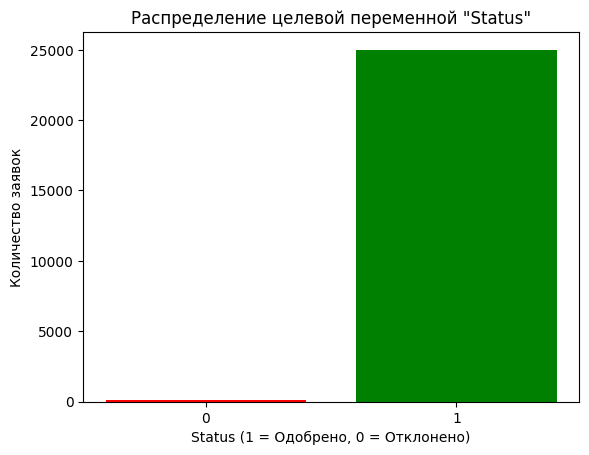

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


status_counts = data['Status'].value_counts()
# print(status_counts) # 0 - 121, 1 - 25007

# Построение гистограммы
plt.bar(status_counts.index, status_counts.values, color=['green', 'red'])
plt.xlabel('Status (1 = Одобрено, 0 = Отклонено)')
plt.ylabel('Количество заявок')
plt.title('Распределение целевой переменной "Status"')
plt.xticks(status_counts.index)
plt.show()

In [ ]:
# Количество уникальных значений целевой переменной (и сами значения)
unique_status_count = data['Status'].nunique()
print('Кол-во уникальных значений: ', unique_status_count)
print('Уникальные значения: ', data['Status'].unique())

Кол-во уникальных значений:  2
Уникальные значения:  [1 0]


ПРОМЕЖУТОЧНЫЕ ВЫВОДЫ

Распределение неоднородно, так как в большей степени в целевой переменной преобладает значение 1.

Для анализа дисбаланса необходимо посчитать процентное соотношение каждой категории от общего количества (здесь очевидно, но для наглядности пусть будет).

In [ ]:
percentages_0 = status_counts[0] / status_counts.sum() * 100
percentages_1 = status_counts[1] / status_counts.sum() * 100
print('Процентное соотношение "0": ', percentages_0)
print('Процентное соотношение "1": ', percentages_1)

Процентное соотношение "0":  0.48153454313912764
Процентное соотношение "1":  99.51846545686087


Распределение является сильно дисбалансированным, так как значение "1" доминирует.

Целевая переменная бинарная, следовательно, распределение дискретное.

Так как целевая переменная ограничена двумя классами, то понятие выбросов не применимо. Но можно считать, что класс "0" - "редкий" класс.

Распределение имеет сильную скошенность, так как одно значение преобладает над другим.

Распределение имеет высокое стандартное отклонение (сильный разброс значений), медиана = 1 (более 50% распределения - это "1"), среднее будет почти 1.

# Основные статистики

*4) Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается одним методом (вы его знаете).*

In [ ]:
statistics = data.describe()

print(statistics)

       Applicant_ID     Owned_Car  Owned_Realty  Total_Children  Total_Income  \
count  2.512800e+04  25128.000000  25128.000000    25128.000000  2.512800e+04   
mean   5.078835e+06      0.418378      0.654927        0.509472  1.948365e+05   
std    4.194378e+04      0.493303      0.475402        0.762937  1.045211e+05   
min    5.008806e+06      0.000000      0.000000        0.000000  2.700000e+04   
25%    5.042226e+06      0.000000      0.000000        0.000000  1.350000e+05   
50%    5.079004e+06      0.000000      1.000000        0.000000  1.800000e+05   
75%    5.115603e+06      1.000000      1.000000        1.000000  2.250000e+05   
max    5.150487e+06      1.000000      1.000000        5.000000  1.575000e+06   

       Owned_Mobile_Phone  Owned_Work_Phone   Owned_Phone   Owned_Email  \
count             25128.0      25128.000000  25128.000000  25128.000000   
mean                  1.0          0.273758      0.292741      0.100684   
std                   0.0          0.445895  

# Инфа по датасету

*5) Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается одним методом (вы его знаете).*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

# Количество пропусков

*6) Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить.*

In [ ]:
missing_values = data.isnull().sum()

print(missing_values)

Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
Status                  0
dtype: int64


Все значения в каждой колонке заполнены.

# Гистограммы 5 признаков

*7) Постройте гистограммы 5 любых признаков (из множества X, или как оно изначально у нас называется data.data). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.*

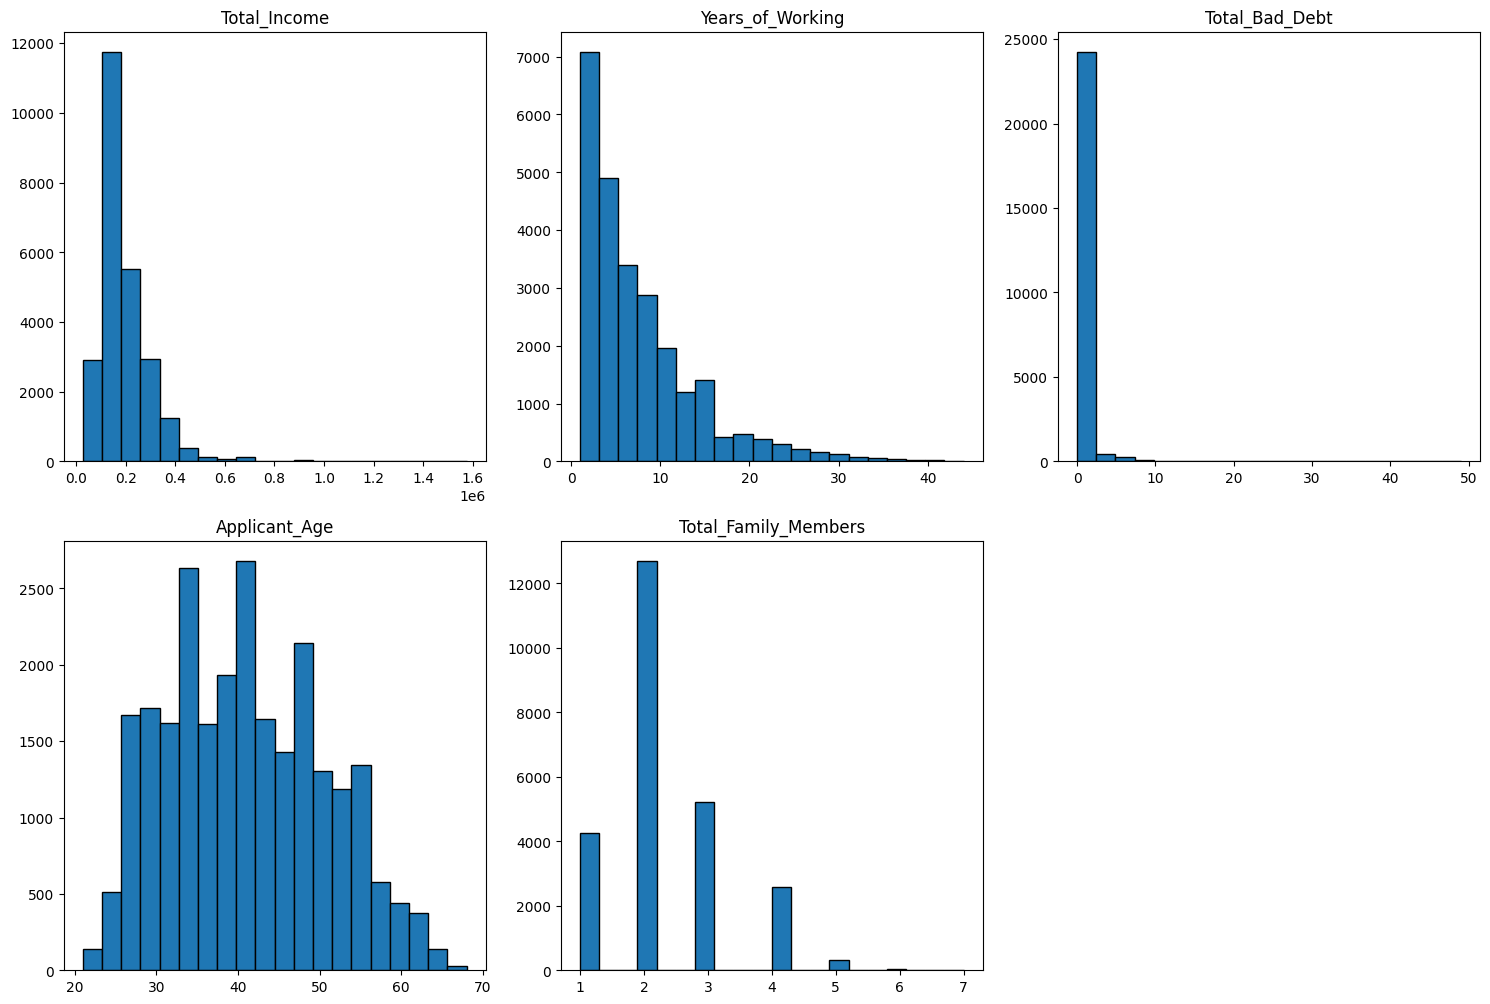

In [ ]:
import matplotlib.pyplot as plt

feature_for_building = ['Total_Income', 'Years_of_Working', 'Total_Bad_Debt', 'Applicant_Age', 'Total_Family_Members']

plt.figure(figsize=(15, 15))
for i, feature in enumerate(feature_for_building):
    plt.subplot(3, 3, i + 1)
    plt.hist(data[feature], bins=20, edgecolor='black')
    plt.title(feature)

plt.tight_layout()
plt.show()

**Total_Income:** Распределение доходов заявителей показывает сильное смещение влево (правосторонняя ассиметрия). Большинство людей имеют достаточно низкий доход (ниже 300 000).

**Years_of_Working:** Наблюдается правосторонняя асимметрия. Большинство заявителей имеют менее 10 лет стажа и только небольшая часть имеет опыт работы свыше 20 лет.

**Total_Bad_Debt:** Крайне выраженная правосторонняя асимметрия. Почти все заявителя не имеют просроченной задолженности (большинство значений находятся на уровне нуля).

**Applicant_Age:** Распределение близко к симметричному, с двумя пиками (около 30 и 40 лет). Ближе к нормальному, что указывает на равномерное представление возрастных групп.

**Totaly_Family_Members:** Распределение числа членов семьи показывает, что большинство заявителей имеют от 2 до 3 человек в семье. Пик - семьи из 2 человек. Гистограмма смещена влево.

# Графики зависимостей

*8) Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)*

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

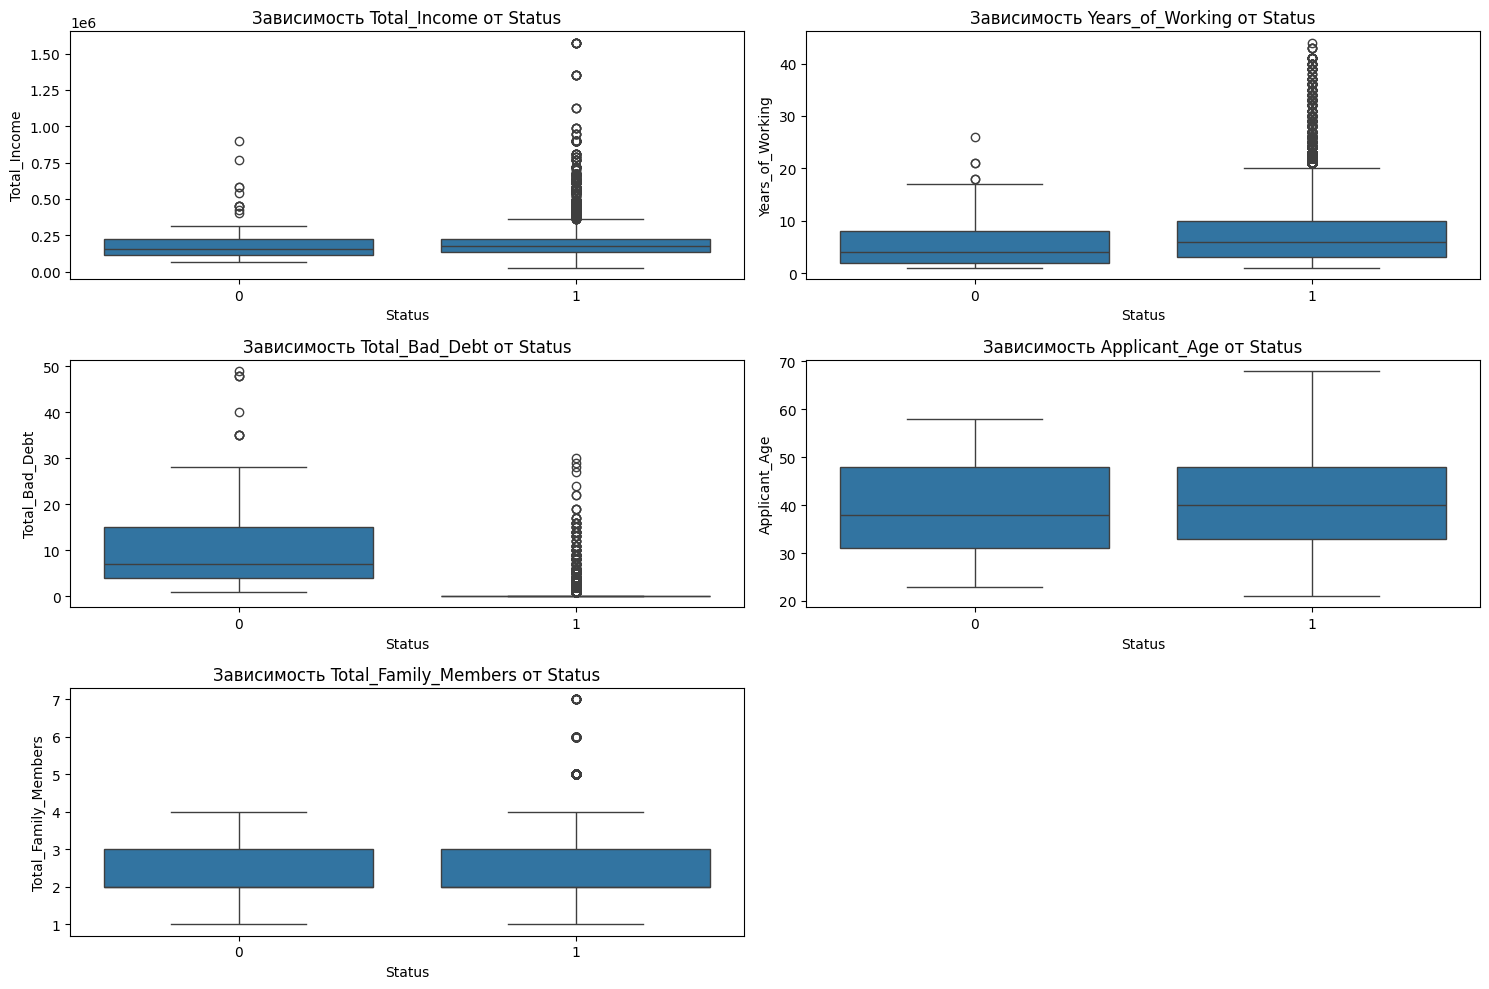

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


variables = ['Total_Income', 'Years_of_Working', 'Total_Bad_Debt', 'Applicant_Age', 'Total_Family_Members']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='Status', y=var, data=data)
    plt.title(f'Зависимость {var} от Status')

plt.tight_layout()
plt.show()


**Total_Income:** По графику видно, что распределения для значений целевой переменной 0 и 1 довольно схожи. Хотя есть выбросы для высоких доходов в группе со статусом 1. Слабая взаимосвязь между доходом и целевой переменной.

**Years_of_Working:** Распределения для обеих категорий целевой переменной также похожи. Наблюдаются небольшие выбросы у группу со статусом 1, основное распределение находится в одном диапазоне. Слабая взаимосвязь между стажем работы и целевой переменной.

**Total_Bad_Debt:** Группа со статусом 1 имеет множество выбросов, из этого можно заметить зависимость. Это может говорить о том, что наличие больших долгов может влиять на статус.

**Applicant_Age:** Распределение возраста в обеих группах выглядит похоже. Слабая взаимосвязь между возрастом заявителя и целевой переменной.

**Total_Family_Members:** Распределения для обеих категорий целевой переменной также похожи. Слабая взаимосвязь между количеством членов семьи и целевой переменной.

# Extra

*9) extra (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная
, по оси OY -- переменная
. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap.*

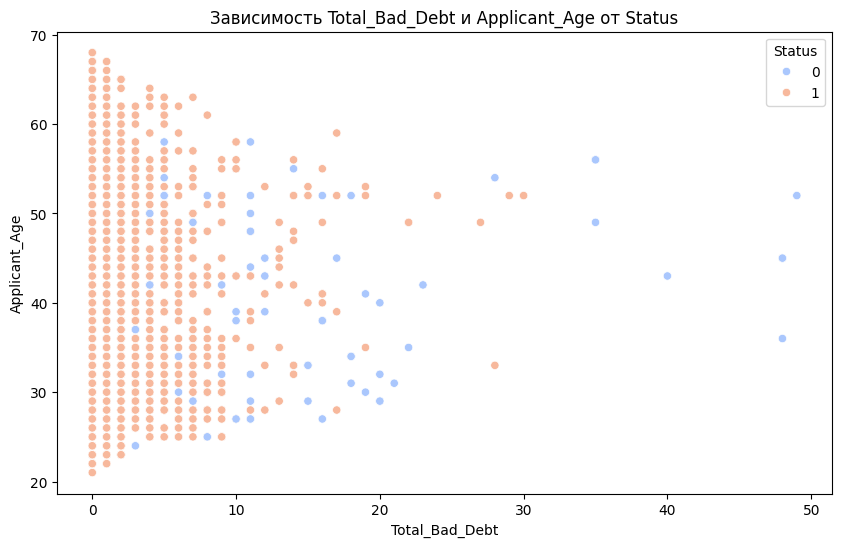

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Bad_Debt', y='Applicant_Age', hue='Status', data=data, palette='coolwarm')
plt.title('Зависимость Total_Bad_Debt и Applicant_Age от Status')
plt.show()


На графике можно увидеть, что статус 1 (оранжевые) чаще встречаются у тех у кого долги ниже или равны нулю, а статус 0 (голубые) чаще встречается при увеличении суммы долга. Есть взаимосвязь между Total_Bad_Debt и Status. Распределение по возрасту равномерное и взаимосвязи с Status не наблюдается.